In [2]:
import sys

# 动态添加test_package文件夹的路径，为了能让此文件夹下的
# 自定义包成功的导入
# 要根据你自己的实际包的模块来决定路径。


if sys.path[-1] != '../../../' :
    sys.path.append('../')
    sys.path.append('../../')
    sys.path.append('../../../')
else:
    pass

# 打印所有python解释器可以搜索到的所有路径
print(sys.path)

['', 'D:\\Python\\Anaconda3\\python36.zip', 'D:\\Python\\Anaconda3\\DLLs', 'D:\\Python\\Anaconda3\\lib', 'D:\\Python\\Anaconda3', 'C:\\Users\\Yukirito\\AppData\\Roaming\\Python\\Python36\\site-packages', 'D:\\Python\\Anaconda3\\lib\\site-packages', 'D:\\Python\\Anaconda3\\lib\\site-packages\\win32', 'D:\\Python\\Anaconda3\\lib\\site-packages\\win32\\lib', 'D:\\Python\\Anaconda3\\lib\\site-packages\\Pythonwin', 'D:\\Python\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Yukirito\\.ipython', '../', '../../', '../../../']


## 在线性回归模型中使用梯度下降法

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [23]:
X = x.reshape(-1, 1)

In [24]:
X.shape

(100, 1)

In [25]:
y.shape # 标记

(100,)

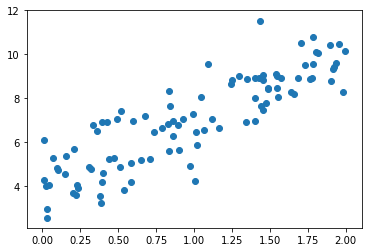

In [26]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练
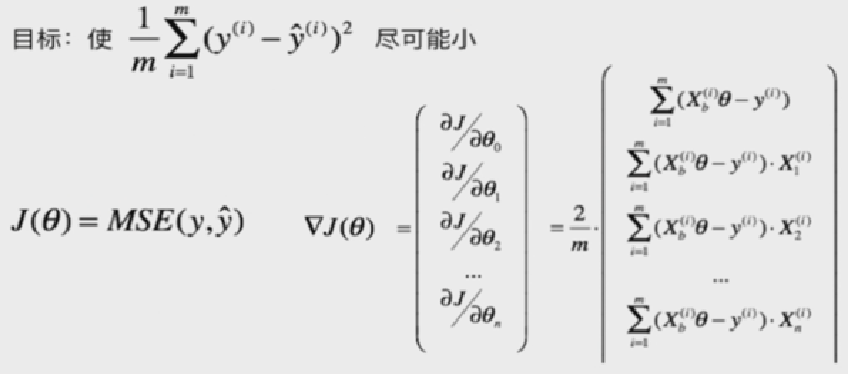

In [27]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [33]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))  # 先开辟一个空间, theta里有多少个元素, 结果就有多少个, 因为theta里的每一个元素求偏导数

In [34]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    '''
    initial_theta: 用户传入的初始值 theta
    eta: 用户传入的初始值 eta
    epsilon: 默认精度 1e-8    
    '''
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y)- J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

In [35]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])  # theta是一个向量, 里面元素的个数是 特征数+1, 也可以传入 X_b的列数
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [36]:
'''
这里就是θ0和θ1, 斜率和截距

和我们创建数据之初定义的 3 和 4 是一样的

说明我们的梯度下降法成功地训练了我们的模型
'''
theta

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [37]:
from playML.LinearRegression import LinearRegreddion

lin_reg = LinearRegreddion()
lin_reg.fit_gd(X, y)

LinearRegression()

In [38]:
lin_reg.coef_

array([3.00706277])

In [39]:
lin_reg.interception_

4.021457858204859